<a href="https://colab.research.google.com/github/SaiArjunSairamje/Probability-and-Stats/blob/main/central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center><ins>Central Limit Theorem (CTL)</ins></center>**


In [ ]:
'''
Central limit theorem:
---------------------------------
> Population, Sample
> From sample, what can be infer about population:
	- Central Limit Theorem (CLT)
	- Confidence Interva (NOTE: next lecture...)
> For population:
	- data.head()	#population
	- mu = data.mean()	#population mean,
	- sigma = data.std()	#population std dev
	- sns.histplot(data)	#distribution
> Analysis of sample size 5:
	- data.sample(5)	#random selection of 5 rows from the population dataset
	- np.mean(data.sample(5))	#mean of one sample mean (NOTE: every time, this mean is different & is close to the population mean of 66.3)
	- sample_mean_5 = [np.mean(data.sample(5)) for i in range(20000)]	#"List Comprehension" - mean of 20000 sample means
	- len(sample_mean_5)	#length of mean of 20000 sample means
	- sns.histplot(sample_mean_5)		#distribution
	- np.mean(sample_mean_5)	#Mean of sample means ≈ mean of population
 	- np.std(sample_mean_5)		#Std dev of sample < Std dev of population
 (NOTE: Standard Error (i.e. Standard deviation of the sample mean): As the number of sample size increases, the "Std dev of sample < Std dev of 	population". This is called as "Standard Error" with the formula "sigma/sqrt(n)")
	- sigma/np.sqrt(5)		#"Standard Error" for n = 5
> Analysis of sample size 20:
	- (Same as above steps but take the random selection of 20 rows)
> Analysis of sample size 100:
	- (Same as above steps but take the random selection of 100 rows)

Formula:
	Let "x̄ = (x1+x2+x3+...+xn)/n" denotes the sample mean.
	Then x̄ follows a normal/gaussian distribution with expected mean.
	That is, "E(x̄)=μ" where "E(x̄)" is expected mean and "μ" is population mean.
	And, Standard deviation of "x̄ = σ / √n"
In other words, x̄ ≈ N(μ, σ/√n)
	That is, x̄ follows a Normal/Gaussian Distribution as "N" with mean as "μ" and std dev as "σ/√n"
NOTE: If n is large (n > 30), then sigma "σ" is finite. That is, original distribution need not be normal distribution...

  Q) Systolic blood pressure of a group of people is known to have an average of 122 mmHg and a standard deviation of 10 mmHg (assume normal distribution). Calculate the probability that the average blood pressure of 16 people will be greater than 125mmHg.
  Q) Weekly to	othpaste sales have a mean 1000 and std dev 200 (assume normal distri). What is the probability that the average weekly sales next month is more than 1110?		(Ans: 0.13)

Customized Code:
	def clt_prob(mu , sigma, n, obs):
  		std_err = sigma/np.sqrt(n)
  		z = (obs - mu)/std_err
  		prob_less = norm.cdf(z)
  		prob_greater = 1 - norm.cdf(z)
  		return prob_less, prob_greater
	#blood pressure
	clt_prob(122, 10, 16, 125)
	#toothpaste
	clt_prob(1000, 200, 4, 1110)

  Q) In an e-commerce website, the average purchase amount per customer is $80 with a standard deviation of $15. If we randomly select a sample of 50 customers, what is the probability that the average purchase amount in the sample will be less than $75?	(Ans: 0.009)
'''

# **Importing the Libraries and Dataset**
***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

In [ ]:
df_hw = pd.read_csv("weight-height.csv")

In [ ]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df_hw.shape

(10000, 3)

In [ ]:
df_height = df_hw["Height"]

# **Population Dataset**
***

In [ ]:
'''
> For population:
	- data.head()	#population
	- mu = data.mean()	#population mean,
	- sigma = data.std()	#population std dev
	- sns.histplot(data)	#distribution
'''

In [ ]:
df_height.head() #population

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [ ]:
mu = df_height.mean() #population mean

In [ ]:
mu

66.36755975482124

In [ ]:
sigma = df_height.std() #population std dev
sigma

3.8475281207732293

<Axes: xlabel='Height', ylabel='Count'>

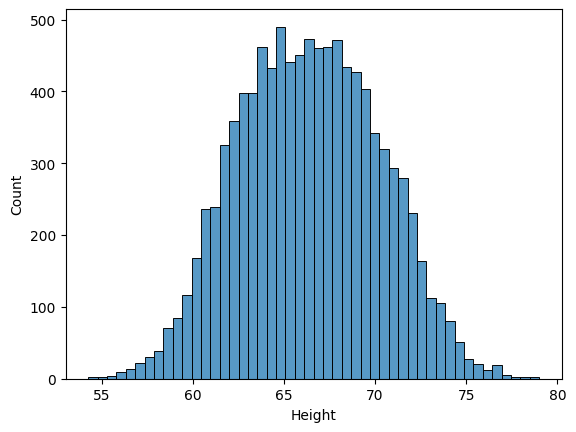

In [ ]:
sns.histplot(df_height)

# **Sample Dataset**
***
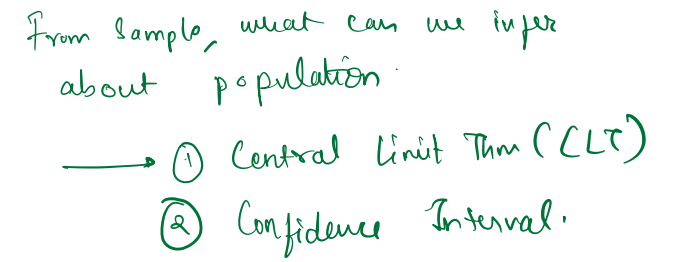

### **Analysis of sample size 5**

In [ ]:
'''
> Analysis of sample size 5:
	- data.sample(5)	#random selection of 5 rows from the population dataset
	- np.mean(data.sample(5))	#mean of one sample mean (NOTE: every time, this mean is different & is close to the population mean of 66.3)
	- sample_mean_5 = [np.mean(data.sample(5)) for i in range(20000)]	#mean of 20000 sample means using list comprehension
	- len(sample_mean_5)	#length of mean of 20000 sample means
	- sns.histplot(sample_mean_5)		#distribution
	- np.mean(sample_mean_5)	#Mean of sample means ≈ mean of population
 	- np.std(sample_mean_5)		#Std dev of sample < Std dev of population
 (NOTE: Standard Error (i.e. Standard deviation of the sample mean): As the number of sample size increases, the "Std dev of sample < Std dev of 	population".
  This is called as "Standard Error" with the formula "sigma/sqrt(n)")
	- sigma/np.sqrt(5)		#"Standard Error" for n = 5
 '''

In [ ]:
df_height.sample(5) #random selection of 5 rows

6091    65.204481
9605    63.329421
214     65.903301
9247    68.206414
3034    71.363595
Name: Height, dtype: float64

In [ ]:
#every time, this mean is different
#it is close to the population mean of 66.3
np.mean(df_height.sample(5))

65.37328655308434

<Axes: ylabel='Count'>

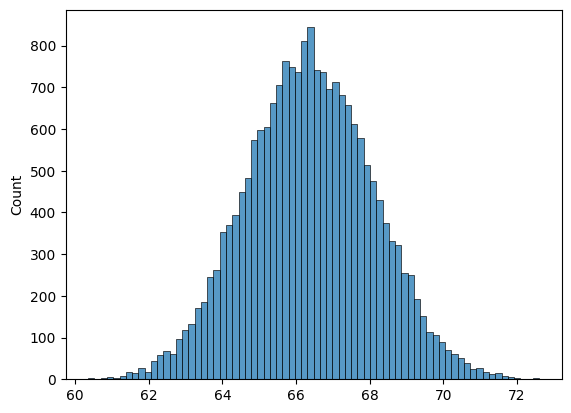

In [ ]:
sample_mean_5 = [np.mean(df_height.sample(5)) for i in range(20000) ]   #"List Comprehension" - mean of 20000 sample means
len(sample_mean_5)  #each of these numbers represents a sample mean of sample size 5
sns.histplot(sample_mean_5)

In [ ]:
np.mean(sample_mean_5)

66.36255067416181

In [ ]:
np.std(sample_mean_5)

1.7226151841454147

In [ ]:
# (sigma = std of the population) / (square root of sample size)
sigma/np.sqrt(5)   #standard error for n = 5

1.7206668846781923

**Observations (1):**      
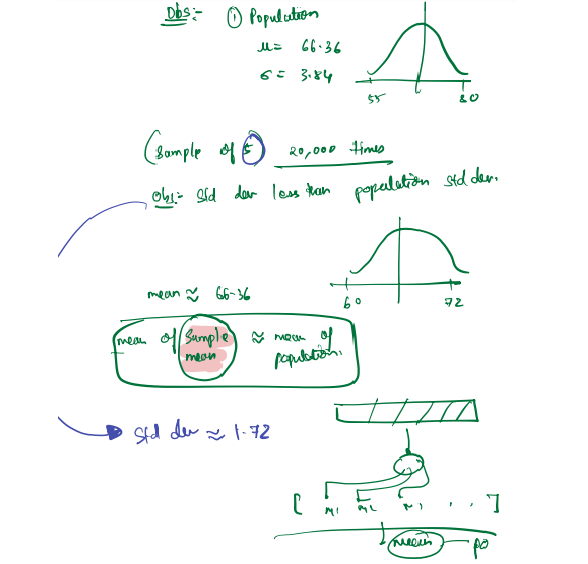

### **Analysis of sample size 20**

In [ ]:
'''
> Analysis of sample size 20:
	- (Same as above steps but take the random selection of 20 rows)
'''

In [ ]:
df_height.sample(20) #random selection of 20 rows

2654    67.919671
7090    64.839564
8450    63.653964
1535    66.854111
262     70.993144
471     68.766162
3976    70.428942
4131    69.543116
9045    66.100469
362     64.955078
5024    66.103873
89      72.316825
5763    63.071171
3501    72.177193
1313    67.612220
5205    64.276243
5637    62.198927
7602    64.467889
7030    64.655848
4496    68.836933
Name: Height, dtype: float64

In [ ]:
np.mean(df_height.sample(20))

66.82875512150743

In [ ]:
sample_mean_20 = [np.mean(df_height.sample(20))  for i in range(20000)]

In [ ]:
len(sample_mean_20)

20000

<Axes: ylabel='Count'>

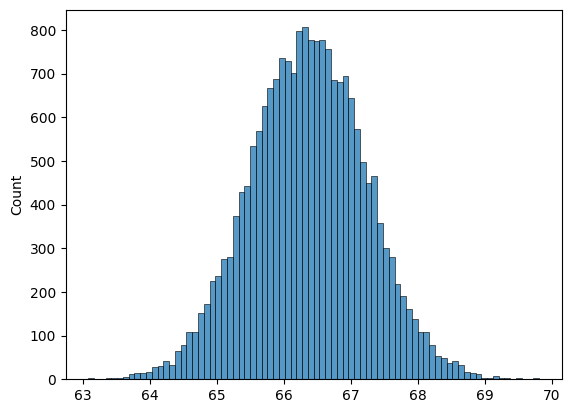

In [ ]:
sns.histplot(sample_mean_20)

In [ ]:
np.mean(sample_mean_20)

66.35823593182431

In [ ]:
np.std(sample_mean_20)

0.8640633962275197

In [ ]:
sigma/np.sqrt(20) #standard error for n = 20

0.8603334423390961

**Observations (2):**   
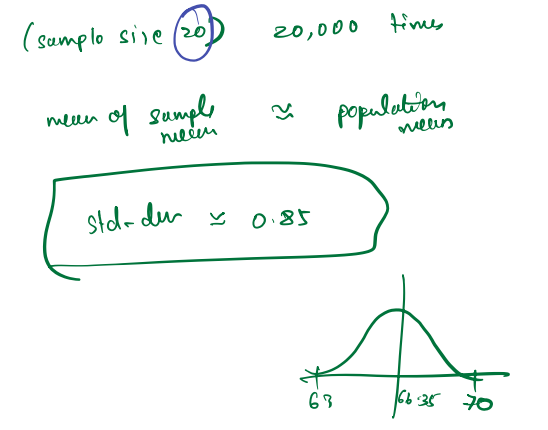

### **Analysis of sample size 100**

In [ ]:
'''
> Analysis of sample size 100:
	- (Same as above steps but take the random selection of 100 rows)
'''

In [ ]:
np.mean(df_height.sample(100))

65.65011698084976

In [ ]:
sample_mean_100 = [np.mean(df_height.sample(100))  for i in range(20000)]

In [ ]:
len(sample_mean_100)

20000

<Axes: ylabel='Count'>

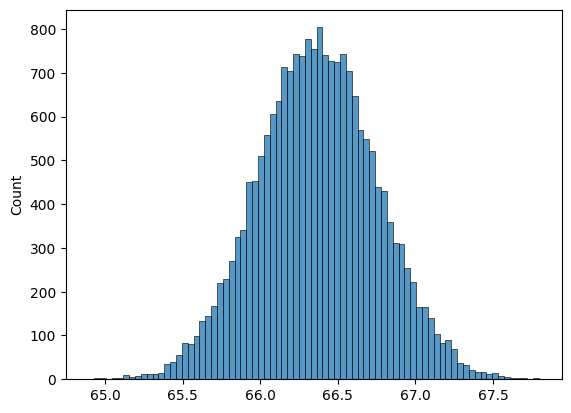

In [ ]:
sns.histplot(sample_mean_100)

In [ ]:
np.mean(sample_mean_100)

66.36730225812927

In [ ]:
np.std(sample_mean_100)

0.3850606095775793

In [ ]:
sigma/np.sqrt(100)  #standard error for n = 100

0.3847528120773229

**Observation (3):**   
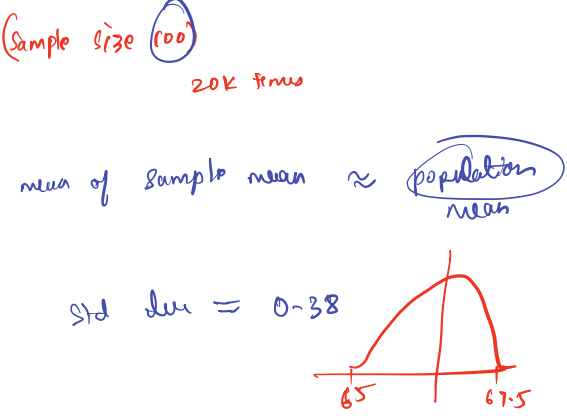

### **Standard-Error (i.e. standard deviation of Sample Means)**    
As the **sampe size ↑** , the **standard deviation of sample mean ↓** , which is also known as **"Standard Error"**.

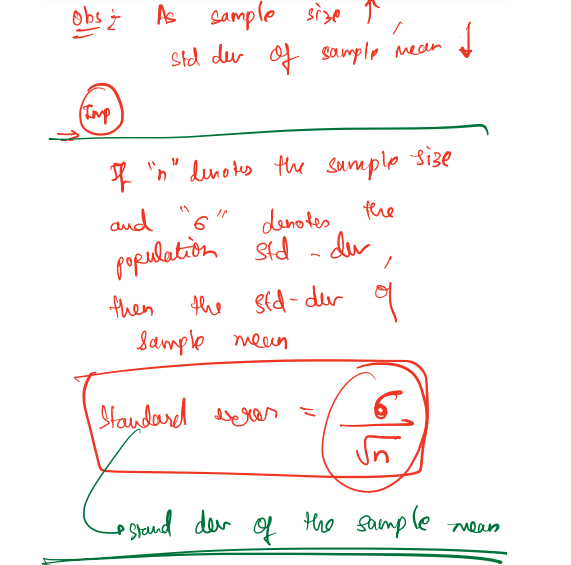

# **Formula & Industry Standards**
***

**Formula:**   
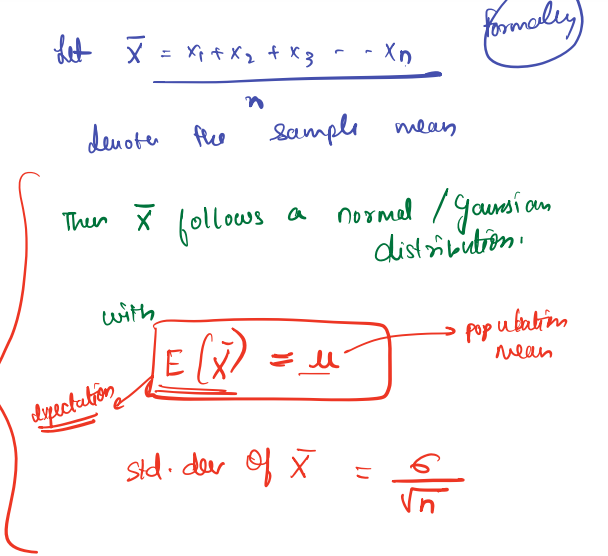



**As per Industry Standard, they follow below approach:**

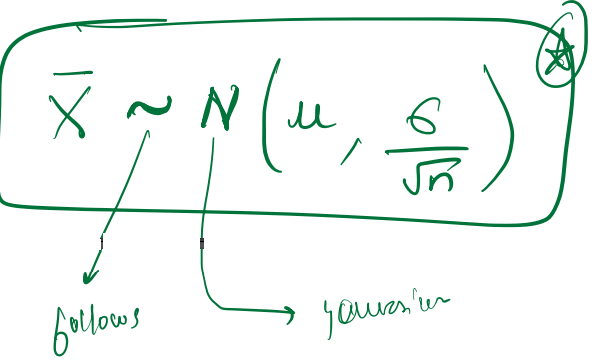

In [ ]:
'''
Formula:
	Let "x̄ = (x1+x2+x3+...+xn)/n" denotes the sample mean.
	Then x̄ follows a normal/gaussian distribution with expected mean.
	That is, "E(x̄)=μ" where "E(x̄)" is expected mean and "μ" is population mean.
	And, Standard deviation of "x̄ = σ / √n"
In other words, x̄ ≈ N(μ, σ/√n)
	That is, x̄ follows a Normal/Gaussian Distribution as "N" with mean as "μ" and std dev as "σ/√n"
'''

# **When will dataset be "Gaussian Distributed/Normal" ???**
***

**`Very IMP:`**    
When ever you take a **sample size of the dataset greater than 30**, then given any dataset which is **either Gaussian Distributed or Not**, when we take a **sample mean and plot the means of the samples**, then it becomes **"Gaussian Distribution/Normal"**.

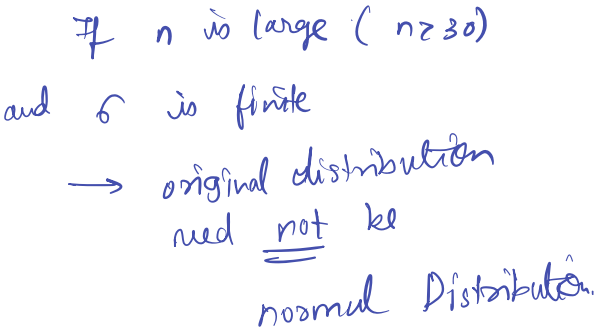

In [ ]:
'''
NOTE: If n is large (n > 30), then sigma "σ" is finite. That is, original distribution need not be normal distribution...
'''

# **Quizzes**
***

### **Quiz-1**

In [ ]:
'''
Systolic blood pressure of a group of people is known to have an average of 122 mmHg and a standard deviation of 10 mmHg. (assume normal distribution)
Calculate the probability that the average blood pressure of 16 people will be greater than 125mmHg.
'''

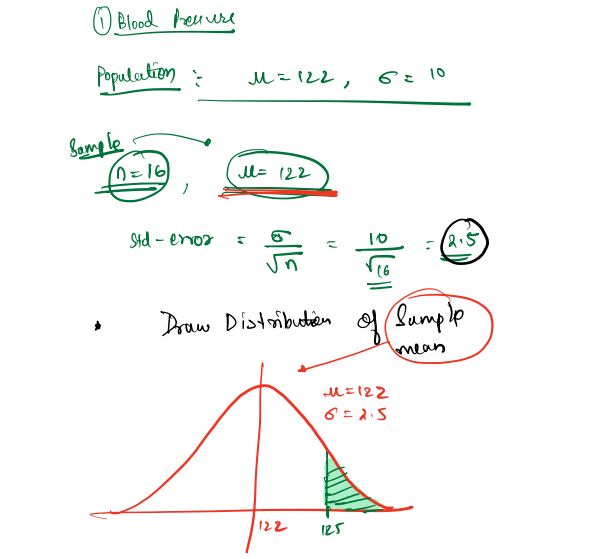

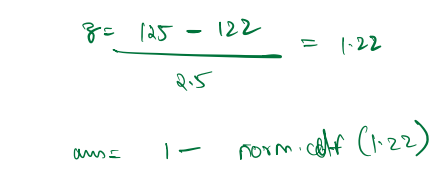

In [ ]:
z = (125 - 122)/2.5       #Z-Score

In [ ]:
ans = 1 - norm.cdf(z)       #Fraction value on y-axis

In [ ]:
print(ans)

0.11506967022170822


### **Quiz-2**

In [ ]:
'''
Weekly toothpaste sales have a mean 1000 and std dev 200. (assume normal distri)
What is the probability that the average weekly sales next month is more than 1110?
'''

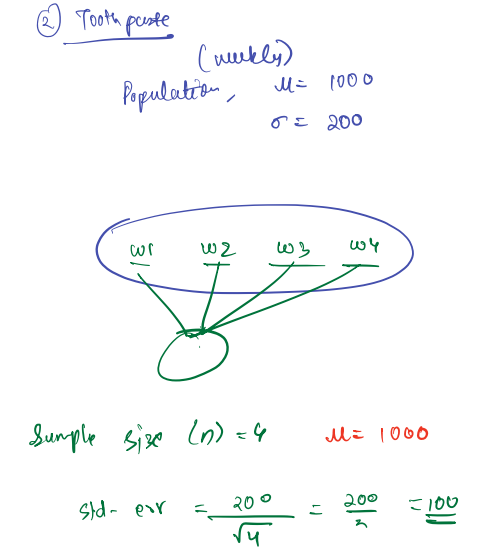

**Draw Distribution of Sample Mean:**          
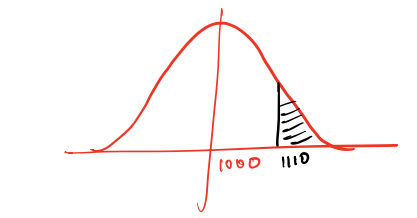

In [ ]:
std_err = 200/np.sqrt(4)

In [ ]:
z = (1110 - 1000)/std_err

In [ ]:
prob_less = norm.cdf(z)

In [ ]:
prob_more = 1 - prob_less

In [ ]:
prob_more

0.13566606094638267

### **[IMP]: Customized Code as per Industry Standard**

In [ ]:
'''
Customized Code:
---------------------
	def clt_prob(mu , sigma, n, obs):
  		std_err = sigma/np.sqrt(n)
  		z = (obs - mu)/std_err
  		prob_less = norm.cdf(z)
  		prob_greater = 1 - norm.cdf(z)
  		return prob_less, prob_greater
	#blood pressure
	clt_prob(122, 10, 16, 125)
	#toothpaste
	clt_prob(1000, 200, 4, 1110)
'''

In [ ]:
def clt_prob(mu , sigma, n, obs):
  std_err = sigma/np.sqrt(n)
  z = (obs - mu)/std_err
  prob_less = norm.cdf(z)
  prob_greater = 1 - norm.cdf(z)
  return prob_less, prob_greater

In [ ]:
#blood pressure
clt_prob(122, 10, 16, 125)

(0.8849303297782918, 0.11506967022170822)

In [ ]:
#toothpaste
clt_prob(1000, 200, 4, 1110)

(0.8643339390536173, 0.13566606094638267)

### **Quiz-3**

In [ ]:
'''
In an e-commerce website, the average purchase amount per customer is $80 with a standard deviation of $15.
If we randomly select a sample of 50 customers,
what is the probability that the average purchase amount in the sample will be less than $75?
'''

In [ ]:
clt_prob(80, 15, 50, 75)

(0.009211062727049501, 0.9907889372729505)